# DALES plot x-y planes
Pretty sure these are at the first level (i.e. z~2.5m)

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean as cmo
from matplotlib.colors import LogNorm

## Load data

In [2]:
# Load data
output_directory = '/scratch/fy29/mxr581/dales/run1'
filename = 'crossxy.0001.010_019.run_1.nc'
file_path = f"{output_directory}/{filename}"
ds_run1 = xr.open_dataset(file_path, chunks = {})

# Load data
output_directory = '/scratch/jk72/mxr581/dales/run2'
filename = 'crossxy.0001.010_019.run_2.nc'
file_path = f"{output_directory}/{filename}"
ds_run2 = xr.open_dataset(file_path, chunks = {})

# Load data
output_directory = '/scratch/fy29/mxr581/dales/run3'
filename = 'crossxy.0001.010_019.run_3.nc'
file_path = f"{output_directory}/{filename}"
ds_run3 = xr.open_dataset(file_path, chunks = {})

In [3]:
#ds_run1

## 1. Virtual potential temperature $\theta_v$ (K)

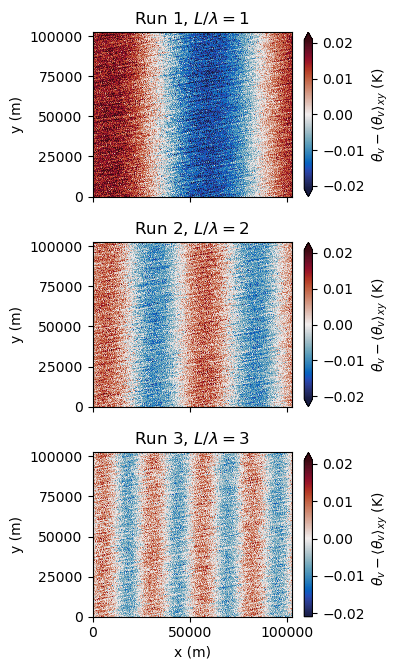

<Figure size 640x480 with 0 Axes>

In [4]:
# virtual potential temperature plane thvxy(time, yt, xt)

# Set up a figure: 3 subplots 
fig, axes = plt.subplots(3, 1, figsize=(4, 6.8), sharex=True)

var_run1 = ds_run1.thvxy.mean('time').compute() - ds_run1.thvxy.mean('time').mean('xt').mean('yt').compute()
var_run2 = ds_run2.thvxy.mean('time').compute() - ds_run2.thvxy.mean('time').mean('xt').mean('yt').compute()
var_run3 = ds_run3.thvxy.mean('time').compute() - ds_run3.thvxy.mean('time').mean('xt').mean('yt').compute()

# common color limits 
vmin = var_run1.min()*0.7
vmax = -vmin 

cbar_kwargs = {'label': r'$\theta_v-\langle \theta_v \rangle_{xy}$ (K)'}

# --- Run 1 ---
var_run1.plot(
    x='xt', y='yt', ax=axes[0], cmap='cmo.balance',
     vmin=vmin, vmax=vmax,
    cbar_kwargs=cbar_kwargs 
)
axes[0].set(title = 'Run 1, $L/\lambda = 1$', xlabel = '', ylabel = 'y (m)')

# --- Run 2 ---
var_run2.plot(
    x='xt', y='yt', ax=axes[1], cmap='cmo.balance',
    vmin=vmin, vmax=vmax,
    cbar_kwargs=cbar_kwargs 
)
axes[1].set(title = 'Run 2, $L/\lambda = 2$', xlabel = '', ylabel = 'y (m)')

#--- Run 3  ---
var_run3.plot(
    x='xt', y='yt', ax=axes[2], cmap='cmo.balance',
     vmin=vmin, vmax=vmax,
    cbar_kwargs=cbar_kwargs 
)
axes[2].set(title = 'Run 3, $L/\lambda = 3$', xlabel = 'x (m)', ylabel = 'y (m)')

plt.tight_layout()
plt.show()
plt.savefig('./notebooks/variable-sst-DALES-analysis/figures/thv-anomaly-xy-planes-hours-10-19.png')

## 2. east-west velocity $u$ (m/s)

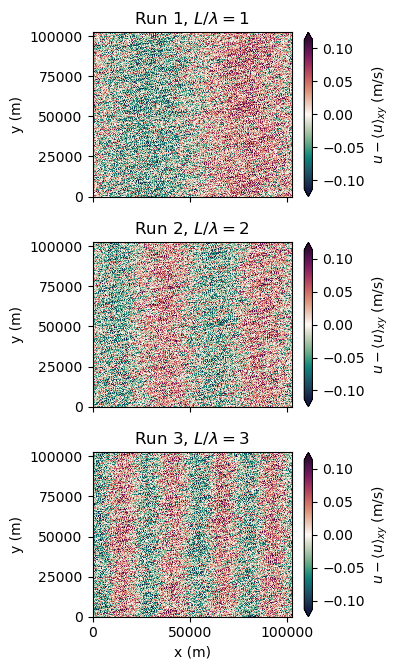

<xarray.DataArray 'uxy' ()> Size: 4B
array(-3.0194674, dtype=float32)


<Figure size 640x480 with 0 Axes>

In [5]:
# east-west velocity plane uxy(time, yt, xm)

# Set up a figure: 3 subplots 
fig, axes = plt.subplots(3, 1, figsize=(4, 6.8), sharex=True)

var_run1 = ds_run1.uxy.mean('time').compute() - ds_run1.uxy.mean('time').mean('xm').mean('yt').compute()
var_run2 = ds_run2.uxy.mean('time').compute() - ds_run2.uxy.mean('time').mean('xm').mean('yt').compute()
var_run3 = ds_run3.uxy.mean('time').compute() - ds_run3.uxy.mean('time').mean('xm').mean('yt').compute()

# common color limits 
vmin = var_run1.min()*0.5
vmax = -vmin 

cbar_kwargs = {'label': r'$u-\langle u \rangle_{xy}$ (m/s)'}

# --- Run 1 ---
var_run1.plot(
    x='xm', y='yt', ax=axes[0], cmap='cmo.curl',
     vmin=vmin, vmax=vmax,
    cbar_kwargs=cbar_kwargs 
)
axes[0].set(title = 'Run 1, $L/\lambda = 1$', xlabel = '', ylabel = 'y (m)')

# --- Run 2 ---
var_run2.plot(
    x='xm', y='yt', ax=axes[1], cmap='cmo.curl',
    vmin=vmin, vmax=vmax,
    cbar_kwargs=cbar_kwargs 
)
axes[1].set(title = 'Run 2, $L/\lambda = 2$', xlabel = '', ylabel = 'y (m)')

#--- Run 3  ---
var_run3.plot(
    x='xm', y='yt', ax=axes[2], cmap='cmo.curl',
     vmin=vmin, vmax=vmax,
    cbar_kwargs=cbar_kwargs 
)
axes[2].set(title = 'Run 3, $L/\lambda = 3$', xlabel = 'x (m)', ylabel = 'y (m)')

plt.tight_layout()
plt.show()
plt.savefig('./notebooks/variable-sst-DALES-analysis/figures/u-anomaly-xy-planes-hours-10-19.png')

print(ds_run1.uxy.mean('time').mean('xm').mean('yt').compute())